# Microbial association networks
With a large set of samples we can infer co-occurrence and co-exclusion patterns between taxa. The interpretation of these associations depends on the experimental design. Say we include oral and fecal samples from human subjects, then the associations would largely be dominated by the environmental preference of the taxa, and the network would likely have two clusters; an oral cluster and a fecal cluster. These networks are often created to infer microbial interactions, but it is difficult to dicern between the effects of interactions on co-occurrence and the effect of shared environment (microbes preferring the same nutrients or aboitic condititions are likely to co-exist). Association networks can probably only be used to infer interactions if great care is taken in the experimental design. Read more [here](https://www.nature.com/articles/s41396-019-0463-3).  

## Types of networks
#### Correlation network
Networks can be based on correlations where we calculate the correlation between each pair of taxa, independent of all the other taxa. These correlations are not affected by which taxa we include in the network, except that the p-value multiple correction is affected by the number of included taxa.

Examples of correlation network methods:
* Spearman on relative abundance
* [Proportionality](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004075)
* [SparCC](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002687)

#### Inverse covariance network
With inverse covariance we seek to remove indirect associations. Say that taxa A has a positive effect on taxa B, and taxa B has a positive effect on taxa C, but taxa A has no effect on taxa C, and vice versa. Taxa A and C would look to be associated, but this is an indirect effect, mediated by taxa B. Inverse covariance seeks to remove these, and all associations are therefore contingent on which taxa are included in the network

Examples of inverse covariance methods:
* [SPIEC-EASI with glasso](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004226)


## Contents
* [Spearman](#spearman)
* [Proportionality](#prop)
* [SparCC](#sparcc)
* [SPEIC-EASI with glasso](#spiec)
* [Heatmap](#heatmap)

## Data

In [1]:
library(phyloseq)
library(DAtest)
load("../data/physeq.RData")

# Agglomorate to Genus level
phy_genus <- tax_glom(phy, "Genus")

# Only keep genera present in at least 10 samples
phy_genus_pre <- preDA(phy_genus, min.samples = 10)

# Extract count table:
otu <- data.frame(otu_table(phy_genus_pre))

DAtest version 2.7.18
204 features grouped as 'Others' in the output


## Spearman<a class="anchor" id="spearman"></a>
The simplest network is to run spearman correlations on all pairs of taxa on relative abundances. 

Transform to relative abundances

In [2]:
otu_rel <- apply(otu, 2, function(x) x/sum(x))

Calculate correlations

In [3]:
net <- cor(t(otu_rel), method = "spearman")

Set redundant correlations to NA

In [4]:
net[lower.tri(net)] <- NA

Transform the correlation matrix to a data.frame:

In [5]:
net_df <- as.data.frame.table(net)

Remove correlations between similar taxa, and the redundant ones:

In [6]:
net_df <- net_df[net_df$Var1 != net_df$Var2 & !is.na(net_df$Freq), ]

Remove correlations below 0.6.

In [7]:
net_df <- net_df[abs(net_df$Freq) > 0.6, ]

This data.frame can then be used to plot the network in for example Gephi, CytoScape, or with ggnet2 in R

In [8]:
colnames(net_df) <- c("Source", "Target", "Cor")
net_df$Weight <- ifelse(net_df$Cor > 0, net_df$Cor, 0)
net_df$Sign <- ifelse(net_df$Cor > 0, "Positive", "Negative")
net_df

,Source,Target,Cor,Weight,Sign
6310,2dc26dda3a7735af9bf29c6bc37c2ecc,f5ab8244460d1988b40f85a9347297c7,0.6010385,0.6010385,Positive
7561,f5ab8244460d1988b40f85a9347297c7,8036a70608aff1a11c728ceaeabb7342,0.6428284,0.6428284,Positive
7897,f5ab8244460d1988b40f85a9347297c7,0978d7032689ab3eeef2fc60e4490e11,0.7690596,0.7690596,Positive
8919,0978d7032689ab3eeef2fc60e4490e11,b6592341b951857fdd6c3889f7c90e92,0.6100780,0.6100780,Positive
9129,f5ab8244460d1988b40f85a9347297c7,b6b05223adf86d071fd279f79dc2533c,0.6830970,0.6830970,Positive
9143,0978d7032689ab3eeef2fc60e4490e11,b6b05223adf86d071fd279f79dc2533c,0.6361042,0.6361042,Positive
9353,f5ab8244460d1988b40f85a9347297c7,9676d0bf5f8468ad67ed9525f3320aee,0.7671811,0.7671811,Positive
9367,0978d7032689ab3eeef2fc60e4490e11,9676d0bf5f8468ad67ed9525f3320aee,0.6951679,0.6951679,Positive
9378,b6b05223adf86d071fd279f79dc2533c,9676d0bf5f8468ad67ed9525f3320aee,0.6468734,0.6468734,Positive
10025,f5ab8244460d1988b40f85a9347297c7,333fc718c6bccdbf0fd4e4f84d0dd38e,0.7413874,0.7413874,Positive


The weight can be used for clustering algorithms, for example Force Atlas in Gephi. In Gephi, negative weights are not supported, so we set all negative correlations to zero (they have no influence on clustering).

## Proportionality<a class="anchor" id="prop"></a>
Proportionality is a correlation method specifically developed for compositional microbial data. It is included in the MicEco package and can be run directly on a phyloseq object:

In [9]:
library(MicEco)
net <- proportionality(phy_genus_pre)

We can then run the same steps as for the Spearman correlation:

In [10]:
net_df <- as.data.frame.table(net)
net_df <- net_df[net_df$Var1 != net_df$Var2, ]
net_df <- net_df[abs(net_df$Freq) > 0.6, ]

As for the Spearman correaltion, you can choose to just set an arbitrary correlation cut-off for including correlations, for example 0.6. It is also possible to calculate p-values through permutations if this is prefered.

In [11]:
colnames(net_df) <- c("Source", "Target", "Cor")
net_df$Weight <- ifelse(net_df$Cor > 0, net_df$Cor, 0)
net_df$Sign <- ifelse(net_df$Cor > 0, "Positive", "Negative")
net_df

,Source,Target,Cor,Weight,Sign
261,95b523dacb244bb891da4c48923d8788,8e61d77c1f6555e76891ac27d58707c6,0.6028116,0.6028116,Positive
4035,8e61d77c1f6555e76891ac27d58707c6,95b523dacb244bb891da4c48923d8788,0.6028116,0.6028116,Positive
6343,0978d7032689ab3eeef2fc60e4490e11,f5ab8244460d1988b40f85a9347297c7,0.6632213,0.6632213,Positive
6353,cde00646e8aecf8aaac49a9bb9c96729,f5ab8244460d1988b40f85a9347297c7,-0.6170330,0.0000000,Negative
6354,b6b05223adf86d071fd279f79dc2533c,f5ab8244460d1988b40f85a9347297c7,0.6927975,0.6927975,Positive
6356,9676d0bf5f8468ad67ed9525f3320aee,f5ab8244460d1988b40f85a9347297c7,0.7786187,0.7786187,Positive
6362,333fc718c6bccdbf0fd4e4f84d0dd38e,f5ab8244460d1988b40f85a9347297c7,0.7192486,0.7192486,Positive
6378,1c88ca8aa0ed62fb2fb8bebb8cb25670,f5ab8244460d1988b40f85a9347297c7,0.6727880,0.6727880,Positive
7897,f5ab8244460d1988b40f85a9347297c7,0978d7032689ab3eeef2fc60e4490e11,0.6632213,0.6632213,Positive
9017,f5ab8244460d1988b40f85a9347297c7,cde00646e8aecf8aaac49a9bb9c96729,-0.6170330,0.0000000,Negative


## SparCC<a class="anchor" id="sparcc"></a>
SparCC is a correlation method which is using various compositional transformations and bootstrapping methods to give reliable correlations on compositional data. The original implemetation is in python, but it is included in the SPIEC-EASI R package.

In [14]:
library(SpiecEasi)

Registered S3 methods overwritten by 'huge':
  method    from
  plot.roc  pROC
  print.roc pROC

Attaching package: 'SpiecEasi'

The following object is masked from 'package:MicEco':

    clr



SparCC bootstraps (be patient..., it is best to use 1000 or 10000 bootstraps, but it takes too long for this example)

In [15]:
sparcc_boot <- sparccboot(t(otu), R = 100)

SparCC p-values

In [16]:
sparcc_pval <- pval.sparccboot(sparcc_boot)

Turn into a data.frame with taxa names

In [17]:
# Correlation data.frame
net <- matrix(NA, nrow(otu), nrow(otu))
net[upper.tri(net, diag=FALSE)] <- sparcc_pval$cors
rownames(net) <- colnames(net) <- rownames(otu)
net_df <- as.data.frame.table(net)

# P-value data.frame
netp <- matrix(NA, nrow(otu), nrow(otu))
netp[upper.tri(netp, diag=FALSE)] <- sparcc_pval$pval
rownames(netp) <- colnames(netp) <- rownames(otu)
netp_df <- as.data.frame.table(netp)

# Combine
sparcc_df <- merge(net_df, netp_df, by = c("Var1", "Var2"))
colnames(sparcc_df) <- c("Source", "Target", "Cor", "Pval")

# Remove redundant
sparcc_df <- sparcc_df[!is.na(sparcc_df$Cor), ]

Add adjusted p-values

In [18]:
sparcc_df$Pval_adj <- p.adjust(sparcc_df$Pval, method = "fdr")

Keep only significant

In [19]:
sparcc_df <- sparcc_df[sparcc_df$Pval_adj <= 0.05, ]

## SPIEC-EASI<a class="anchor" id="speic"></a>
SPIEC-EASI is a method based on graphical model inference developed specifically for microbial sequence data. There are 3 steps in the SPIEC-EASI analysis: data transformation, graphical model inference, model selection.

SPIEC-EASI might at first seem much more complicated than the other methods, but it has a big strength in that one does not have to choose an arbitrary correlation or p-value cut-off for determning inclusion of edges, SPIEC-EASI tries to estimate this for us automatically.

### Data transformation
Data are CLR-transformed, similar to what is done prior to calculating Proportionality.

### Graphical model inference
The graphical model can be inferred through either neighborhood selection (mb) or inverse covariance selection (glasso). Inverse covariance is in itself simple to estimate, but since we are usually having many more taxa than samples, we cannot infer inverse covariance through the usual calculations. We therefore use methods for sparse inverse covariance estimation, relying on the assumption that most covariances are small or zero. The amount of sparsity is controlled with a lambda parameter. Both the mb and the glasso methods estimate models over a range of lambda values, and we need a way to pick the final model to use.

### Model selection
SPIEC-EASI uses the (bounded) stars criterion for model selection, to choose the lambda parameter which produces the best graphical model.

### In R:

In [20]:
se <- spiec.easi(phy_genus_pre, method='glasso', lambda.min.ratio=1e-3, nlambda=30,
               sel.criterion='bstars', pulsar.select=TRUE, pulsar.params=list(rep.num=50, seed=42))

Applying data transformations...
Selecting model with pulsar using bstars...
Fitting final estimate with glasso...
done


In [21]:
# Get covariances and transform to correlations
netc <- cov2cor(as.matrix(getOptCov(se)))
rownames(netc) <- colnames(netc) <- taxa_names(phy_genus_pre)
netc_df <- as.data.frame.table(netc)

# Get chosen edges
net <- as.matrix(getRefit(se))
rownames(net) <- colnames(net) <- taxa_names(phy_genus_pre)
net_df <- as.data.frame.table(net)

# Combine
se_df <- merge(netc_df, net_df, by = c("Var1", "Var2"))
colnames(se_df) <- c("Source", "Target", "Cor", "Selected")

Subset to only the chosen edges

In [22]:
se_df <- se_df[se_df$Selected == 1, ]

Note that since the covariances are penalized, they are much smaller than from the other methods, and not directly comparable. They can, however, still be used as weights when plotting the network.

## Heatmap<a class="anchor" id="heatmap"></a>
You can plot the networks as a heatmap with the pheatmap package:

In [23]:
library(pheatmap)

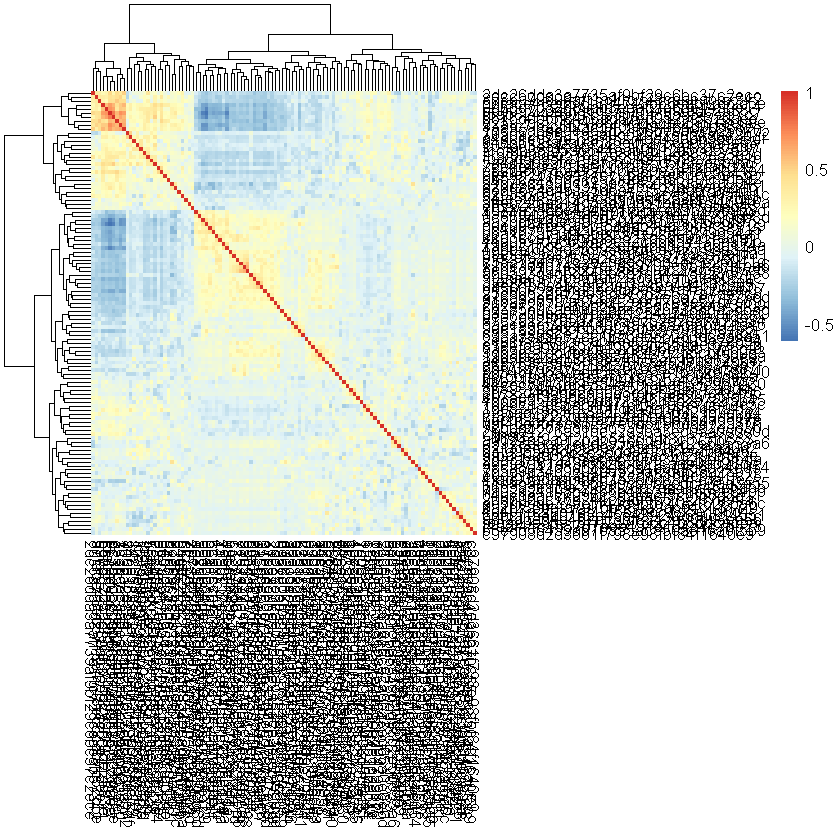

In [25]:
net <- proportionality(phy_genus_pre)
pheatmap(net)